In [31]:
import pandas as pd
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
from pyvis.network import Network
import seaborn as sns
import pyvis

In [32]:
# Import relationship data

relationship_df = pd.read_csv('20th_century_country_relationships.csv', index_col = 0)

In [33]:
relationship_df

,Country2,Weight
Country1,,
France,Germany,68
Germany,Italy,42
Austria,Germany,40
Germany,Poland,35
France,Poland,35
...,...,...
Finland,Greece,2
Italy,Latvia,2
Greece,Lithuania,1


In [34]:
df_edges = relationship_df.reset_index()
print(df_edges.head())

  Country1 Country2  Weight
0   France  Germany      68
1  Germany    Italy      42
2  Austria  Germany      40
3  Germany   Poland      35
4   France   Poland      35


In [36]:
G = nx.from_pandas_edgelist(
   df_edges, 
    source="Country1", 
    target="Country2", 
    edge_attr="Weight", 
    create_using=nx.Graph()
)

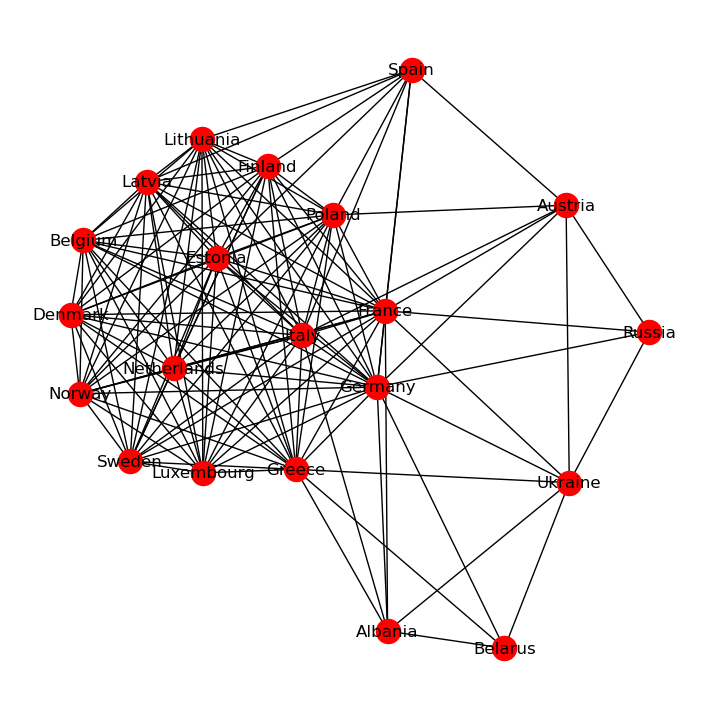

In [37]:
# plotting country connections in networkx

h = plt.figure(figsize = (7,7))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels = True, node_color = 'red', edge_cmap = plt.cm.Blues, pos = pos)
plt.show() 

In [38]:
h.savefig('networkx_countries.png')

In [39]:
# Define net object

net = Network()
net = Network(notebook = True,width="900px", height="800px", bgcolor='#222222', font_color='white')

# Define nodes from the G object
node_degree = dict(G.degree)

# Setting up node size attributes
nx.set_node_attributes(G, node_degree, 'size')
net.from_nx(G)
net.show_buttons(filter_ = True)
net.repulsion()
net.show("pyvis_countries.html")

pyvis_countries.html


In [40]:
from cdlib import algorithms
coms = algorithms.leiden(G)

Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'bayanpy', 'graph_tool', 'wurlitzer'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'ASLPAw', 'pyclustering'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'wurlitzer'}


In [41]:
type(coms)

cdlib.classes.node_clustering.NodeClustering

In [42]:
new_com = coms.to_node_community_map()

In [43]:
new_com

defaultdict(list,
            {'Italy': [0],
             'Poland': [0],
             'Greece': [0],
             'Belgium': [0],
             'Denmark': [0],
             'Norway': [0],
             'Finland': [0],
             'Sweden': [0],
             'Latvia': [0],
             'Luxembourg': [0],
             'Netherlands': [0],
             'Estonia': [0],
             'Lithuania': [0],
             'France': [1],
             'Germany': [1],
             'Austria': [1],
             'Ukraine': [1],
             'Albania': [1],
             'Belarus': [1],
             'Russia': [1],
             'Spain': [1]})

In [44]:
# Put the output from new_com into a dictionary

dict_com = {k:v[0] for k,v in new_com.items()}

In [45]:
dict_com

{'Italy': 0,
 'Poland': 0,
 'Greece': 0,
 'Belgium': 0,
 'Denmark': 0,
 'Norway': 0,
 'Finland': 0,
 'Sweden': 0,
 'Latvia': 0,
 'Luxembourg': 0,
 'Netherlands': 0,
 'Estonia': 0,
 'Lithuania': 0,
 'France': 1,
 'Germany': 1,
 'Austria': 1,
 'Ukraine': 1,
 'Albania': 1,
 'Belarus': 1,
 'Russia': 1,
 'Spain': 1}

In [49]:
# Rerun network graph with the communities as an argument

nx.set_node_attributes(G, dict_com, 'group')
com_net = Network(notebook = True, width="1300px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show_buttons(filter_ = True)
com_net.repulsion()
com_net.show("country_communities_leiden.html")

country_communities_leiden.html


## The communities makes sense the countries in blue are heavily involved in WW2 while the ones in yellow are less involved in WW2 the only exception is Italy who is quite involved in WW2 yet isn't in the same group as the others

## Also unsure why but neither Japan or United States appears on this I'm not sure if thats intended or if my scrape somehow was wrong in the last task

In [51]:
# Degree centrality

degree_dict = nx.degree_centrality(G)
degree_dict

{'France': 0.9500000000000001,
 'Germany': 1.0,
 'Italy': 0.8500000000000001,
 'Austria': 0.35000000000000003,
 'Poland': 0.8,
 'Ukraine': 0.35000000000000003,
 'Greece': 0.8500000000000001,
 'Belgium': 0.7000000000000001,
 'Denmark': 0.7000000000000001,
 'Norway': 0.7000000000000001,
 'Finland': 0.75,
 'Sweden': 0.7000000000000001,
 'Latvia': 0.75,
 'Luxembourg': 0.7000000000000001,
 'Netherlands': 0.7000000000000001,
 'Estonia': 0.75,
 'Albania': 0.30000000000000004,
 'Belarus': 0.2,
 'Lithuania': 0.75,
 'Russia': 0.2,
 'Spain': 0.45}

In [53]:
degree_df = pd.DataFrame(degree_dict.items(), columns=['countries','centrality'])

In [54]:
degree_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

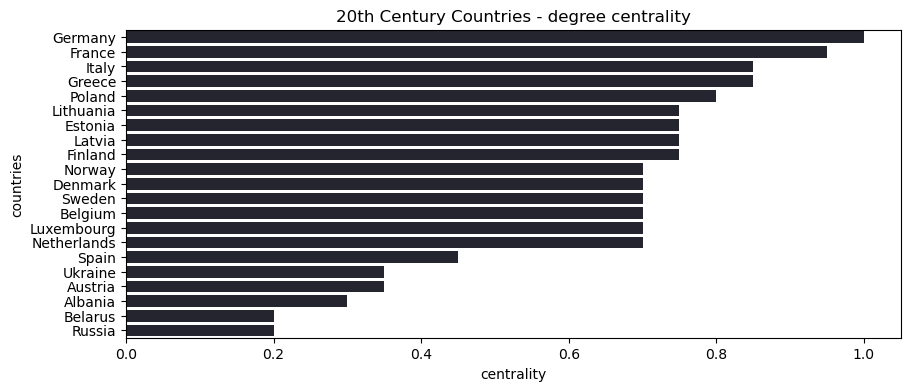

In [56]:
# Plot the degree centrality

plt.figure(figsize = (10, 4))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = degree_df).set_title("20th Century Countries - degree centrality")

In [57]:
# Closeness centrality

closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame(closeness_dict.items(), columns=['countries','centrality'])

In [58]:
closeness_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

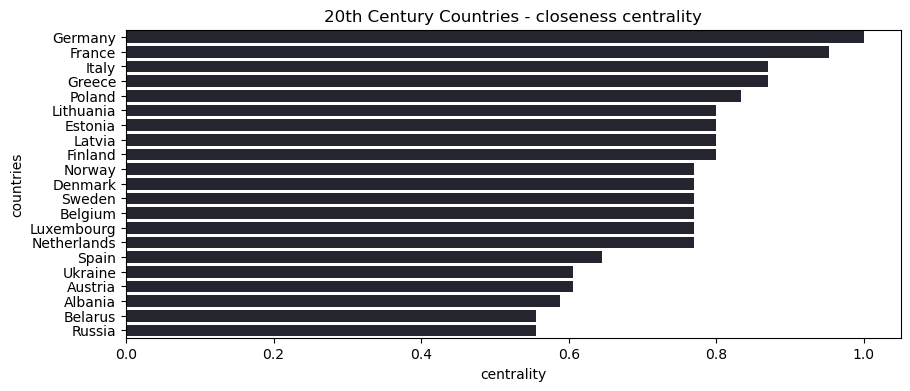

In [60]:
plt.figure(figsize = (10, 4))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = closeness_df).set_title("20th Century Countries - closeness centrality")

In [61]:
# Betweenness centrality

betweenness_dict = nx.betweenness_centrality(G)
betweennes_df = pd.DataFrame(betweenness_dict.items(), columns=['countries','centrality'])

In [62]:
betweennes_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

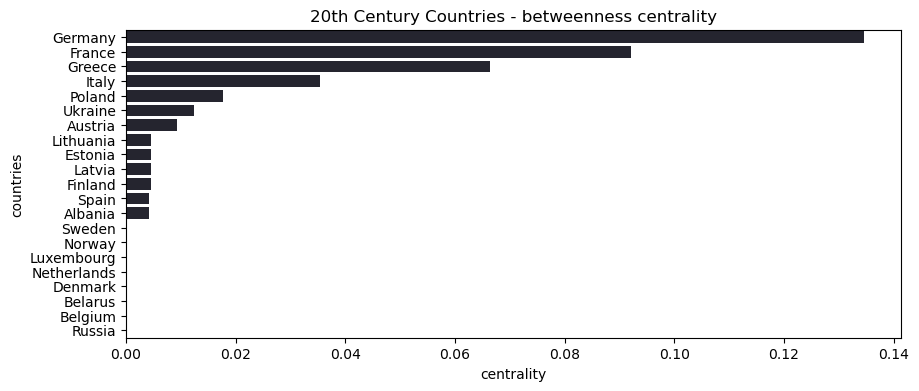

In [64]:
plt.figure(figsize = (10, 4))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = betweennes_df).set_title("20th Century Countries - betweenness centrality")

### Germany is always the highest which makes sense as they were the main country envolved in WW2

### France is always second and Italy is third except in the betweenness which is actually Greece instead

### The only countries listed are european countries which like I said above i'm not sure if this is intended or if they way i created the relationship_df was faulty